In [1]:
import sys
import snap
import itertools
from IPython.display import Image, display

print("Hello World")

Hello World


In [2]:
status = False
try:
    import snap
    version = snap.Version
    i = snap.TInt(5)
    if i == 5:
        status = True
except:
    pass

if status:
    print("SUCCESS, your version of Snap.py is %s" % (version))
else:
    print("*** ERROR, no working Snap.py was found on your computer")


SUCCESS, your version of Snap.py is 5.0.0


## Read .txt

In [3]:
FOLDER_NAME = "./"
case_name = "stackoverflow-Java"
case_txt = FOLDER_NAME + case_name+".txt"
case_png = FOLDER_NAME + case_name+".png"
G5 = snap.LoadEdgeList(snap.PNGraph, case_txt, 0, 1)

In [4]:
def get_nodes_and_edges(my_graph):
    n_nodes = my_graph.GetNodes()
    n_edges = my_graph.GetEdges()
    print(f"The graph has {n_nodes:,d} nodes; {n_edges:,d} edges")

In [5]:
get_nodes_and_edges(G5)

The graph has 146,874 nodes; 333,606 edges


## Weakly connected component

### Q1

In [6]:
## TCnComV, a vector of connected components;
wcc = snap.TCnComV()
snap.GetWccs(G5, wcc)
print(f"Weakly connected components: {len(list(wcc)):,d}")

Weakly connected components: 10,143


### (optional) Q1

In [7]:
for CnCom in list(wcc)[:5]:
    print("Size of component: %d" % CnCom.Len())

Size of component: 131188
Size of component: 7
Size of component: 7
Size of component: 6
Size of component: 6


In [8]:
ComponentDist = snap.TIntPrV()
snap.GetWccSzCnt(G5, ComponentDist)
for comp in ComponentDist:
    print("Size: %d - Number of Components: %d" % (comp.GetVal1(), comp.GetVal2()))

Size: 1 - Number of Components: 5191
Size: 2 - Number of Components: 4462
Size: 3 - Number of Components: 406
Size: 4 - Number of Components: 68
Size: 5 - Number of Components: 11
Size: 6 - Number of Components: 2
Size: 7 - Number of Components: 2
Size: 131188 - Number of Components: 1


In [9]:
node_id = []

for CnCom in list(wcc)[1:2]:
    print("Size of component: %d" % CnCom.Len())
    for NI in CnCom:
        node_id.append(NI)

print(node_id)

Size of component: 7
[962953, 1249994, 1630096, 1952282, 2261111, 3101517, 3324935]


In [10]:
def func_in_out_degree(my_graph, node_id):
    InDegV = snap.TIntPrV()
    snap.GetNodeInDegV(my_graph, InDegV)

    OutDegV = snap.TIntPrV()
    snap.GetNodeOutDegV(my_graph, OutDegV)

    print("--- In Degree ---")
    for item in InDegV:
        if item.GetVal1() in node_id:
            print("node ID %d: in-degree %d" % (item.GetVal1(), item.GetVal2()))

    print("--- Out Degree ---")
    for item in OutDegV:
        if item.GetVal1() in node_id:
            print("node ID %d: out-degree %d" % (item.GetVal1(), item.GetVal2()))

In [11]:
func_in_out_degree(G5, node_id)

--- In Degree ---
node ID 962953: in-degree 0
node ID 1630096: in-degree 3
node ID 3101517: in-degree 0
node ID 1952282: in-degree 0
node ID 3324935: in-degree 0
node ID 1249994: in-degree 2
node ID 2261111: in-degree 1
--- Out Degree ---
node ID 962953: out-degree 3
node ID 1630096: out-degree 0
node ID 3101517: out-degree 1
node ID 1952282: out-degree 1
node ID 3324935: out-degree 1
node ID 1249994: out-degree 0
node ID 2261111: out-degree 0


In [12]:
def get_subgraph(my_large_graph, node_id):
    NIdV = snap.TIntV()
    for i in node_id:
        NIdV.Add(i)

    SubGraph = snap.GetSubGraph(my_large_graph, NIdV)
    for EI in SubGraph.Edges():
        print("edge (%d %d)" % (EI.GetSrcNId(), EI.GetDstNId()))
    return SubGraph

In [13]:
sub_graph = get_subgraph(G5, node_id)

edge (962953 1249994)
edge (962953 1630096)
edge (962953 2261111)
edge (1952282 1630096)
edge (3101517 1630096)
edge (3324935 1249994)


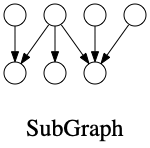

In [14]:
case_name = "SubGraph"
case_txt = case_name+".txt"
case_png = case_name+".png"

snap.DrawGViz(sub_graph, snap.gvlDot, case_png, case_name)
Image(case_png)

### Q2

In [15]:
## get largest weakly connected component of G
wccLargestG = snap.GetMxWcc(G5)

# Define a vector of pairs of integers (size, count) and 
# get a distribution of connected components (component size, count):

ComponentDist = snap.TIntPrV()
snap.GetWccSzCnt(wccLargestG, ComponentDist)
for comp in ComponentDist:
    print("Size: %d - Number of Components: %d" % (comp.GetVal1(), comp.GetVal2()))

Size: 131188 - Number of Components: 1


In [16]:
get_nodes_and_edges(wccLargestG)

The graph has 131,188 nodes; 322,486 edges


## Q3

In [17]:
PRankH = snap.TIntFltH()
snap.GetPageRank(G5, PRankH)

In [18]:
N = 5
top_N = itertools.islice(PRankH, N) # grab the first N elements

for item in top_N:
    print(item, PRankH[item])

78 2.4082266411394174e-06
86 1.0954090787330643e-05
58 2.7410854878087346e-06
35 1.8556239858111125e-05
122 4.355801112478744e-05


In [19]:
def func_get_top_N(input_hash_table, show_top_N):
    id_value_tuple_list = []
    for item in input_hash_table:
        id_value_tuple_list.append((item, input_hash_table[item]))
        
    sorted_list = sorted(id_value_tuple_list, key=lambda x: x[1], reverse=True)    
    return [i[0] for i in sorted_list[:show_top_N]]

In [20]:
func_get_top_N(PRankH, 3)

[992484, 135152, 22656]

In [21]:
func_in_out_degree(G5, func_get_top_N(PRankH, 3))

--- In Degree ---
node ID 22656: in-degree 3999
node ID 135152: in-degree 17
node ID 992484: in-degree 1940
--- Out Degree ---
node ID 22656: out-degree 0
node ID 135152: out-degree 1
node ID 992484: out-degree 1


### Q4

In [22]:
## http://snap.stanford.edu/snappy/doc/reference/GetHits.html?highlight=gethits
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(G5, NIdHubH, NIdAuthH)

In [23]:
hub_node_id = func_get_top_N(NIdHubH, 3)
print("Hubs:", hub_node_id)

Hubs: [892029, 1194415, 359862]


In [24]:
authority_node_id = func_get_top_N(NIdAuthH, 3)
print("Authorities:", authority_node_id)

Authorities: [22656, 157882, 571407]


### (optional) Q4

In [25]:
for curr_id in hub_node_id:
    print("ID:", curr_id)
    func_in_out_degree(G5, [curr_id])

ID: 892029
--- In Degree ---
node ID 892029: in-degree 3
--- Out Degree ---
node ID 892029: out-degree 434
ID: 1194415
--- In Degree ---
node ID 1194415: in-degree 5
--- Out Degree ---
node ID 1194415: out-degree 374
ID: 359862
--- In Degree ---
node ID 359862: in-degree 6
--- Out Degree ---
node ID 359862: out-degree 193


In [26]:
for curr_id in authority_node_id:
    print("ID:", curr_id)
    func_in_out_degree(G5, [curr_id])

ID: 22656
--- In Degree ---
node ID 22656: in-degree 3999
--- Out Degree ---
node ID 22656: out-degree 0
ID: 157882
--- In Degree ---
node ID 157882: in-degree 2828
--- Out Degree ---
node ID 157882: out-degree 6
ID: 571407
--- In Degree ---
node ID 571407: in-degree 2714
--- Out Degree ---
node ID 571407: out-degree 2


### (optional) Plot

In [27]:
# import time
# t0 = time.time()
# NIdV = snap.TIntV()
# for i in range(1, 101):
#     NIdV.Add(i)

# demo_graph = snap.GenRndGnm(snap.PNGraph, 200, 1000)
# demo_subgraph = snap.GetSubGraph(demo_graph, NIdV)

# case_name = "plot_subgraph"
# case_txt = case_name+".txt"
# case_png = FOLDER_NAME + case_name+".png"

# snap.DrawGViz(demo_subgraph, snap.gvlDot, case_png, case_name)
# print(f"Elapsed time: {time.time()-t0:.4f} second.")
# Image(case_png)

## Elapsed time: 0.9056 second.

In [28]:
# t0 = time.time()
# case_name = "plot_graph"
# case_txt = case_name+".txt"
# case_png = case_name+".png"

# snap.DrawGViz(demo_graph, snap.gvlDot, case_png, case_name)
# print(f"Elapsed time: {time.time()-t0:.4f} second.")
# Image(case_png)

## Elapsed time: 727.2719 second.

### (option) Modularity

In [29]:
def convert_for_modularity(g_in, show_graph=False):
    g_out = snap.ConvertGraph(snap.PUNGraph, g_in)
    CmtyV = snap.TCnComV()
    modularity = snap.CommunityCNM(g_out, CmtyV)
    print(f"The modularity is {modularity:.4f}")
    case_png = 'show_demo.png'
    snap.DrawGViz(g_out, snap.gvlDot, case_png, 'demo')
    display(Image(case_png))
    

The modularity is 0.1667


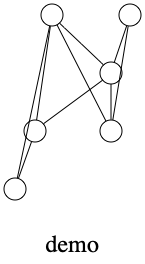

In [30]:
my_graph = snap.GenRndGnm(snap.PNGraph, 6, 10)
convert_for_modularity(my_graph, True)

### (optional) Log-log Plot

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def get_xy(graph_in):
    # vector of pairs of integers (size, count)
    CntV = snap.TIntPrV()
    # get degree distribution pairs (degree, count)
    snap.GetOutDegCnt(graph_in, CntV)

    # for item in CntV:
    #     if item.GetVal1() < 10:
    #         print(f"{item.GetVal2()} nodes with out-degree {item.GetVal1()}")

    ## Note:
    ## pair (x, y):  
    ## y is the number of nodes in the network 
    ## with out-degree equal to x.

    pair_list = []
    for item in CntV:
        if item.GetVal1() > 0:
#             print(f" {item.GetVal1():,.0f} out-degree: {item.GetVal2()} nodes")
            pair_list.append((item.GetVal1(), item.GetVal2()))
    
    x_data = [i[0] for i in pair_list]
    y_data = [i[1] for i in pair_list]
    return x_data, y_data

def fit_xy(x_data, y_data):
    log_x = [math.log(i, 10) for i in x_data]
    log_y = [math.log(i, 10) for i in y_data]
    slope, intercept = np.polyfit(log_x, log_y, 1)
    fitted_y = [math.pow(i, slope)* math.pow(10, intercept) for i in x_data]
    return x_data, fitted_y


## Out degree plot
> Each data point is a pair (x, y) where x is a positive integer and y is the number of nodes in the network with <span style="color:yellow">**out-degree** </span> equal to x.

### Stackoverflow

> An edge (a, b) in the network means that person a endorsed an answer from person b on a Java-related question.

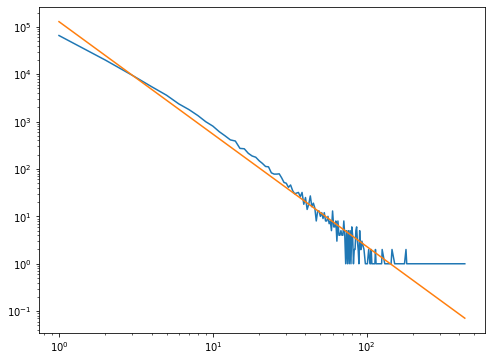

In [32]:
x_, y_ = get_xy(G5)
_, y_fitted_ = fit_xy(x_, y_)

plt.figure(figsize= [8, 6])
plt.loglog(x_, y_)
plt.loglog(x_, y_fitted_)
plt.show()

### Wiki-vote
> An edge (a, b) ∈ E means that user a voted on user b.

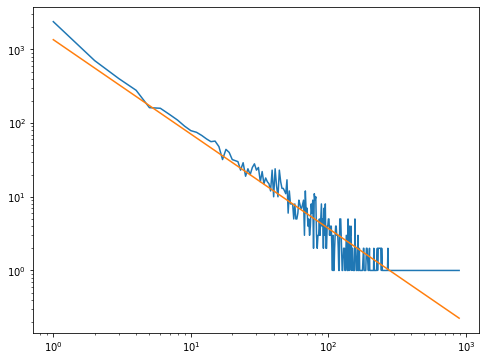

In [33]:
case_name = "wiki-Vote"
case_txt = case_name+".txt"
g_hw0_q2 = snap.LoadEdgeList(snap.PNGraph, case_txt, 0, 1)

x_, y_ = get_xy(g_hw0_q2)
_, y_fitted_ = fit_xy(x_, y_)

plt.figure(figsize= [8, 6])
plt.loglog(x_, y_)
plt.loglog(x_, y_fitted_)
plt.show()

## In degree plot
> Each data point is a pair (x, y) where x is a positive integer and y is the number of nodes in the network with <span style="color:orange">**in-degree** </span> equal to x.

In [34]:
def get_xy_GetInDegCnt(graph_in, print_values=False):
    # vector of pairs of integers (size, count)
    CntV = snap.TIntPrV()
    # get degree distribution pairs (degree, count)
    snap.GetInDegCnt(graph_in, CntV)

    ## Note:
    ## pair (x, y):  
    ## y is the number of nodes in the network 
    ## with out-degree equal to x.

    pair_list = []
    for item in CntV:
        if item.GetVal1() > 0:
            if print_values:
                print(f" {item.GetVal1():,.0f} in-degree: {item.GetVal2()} nodes")
            pair_list.append((item.GetVal1(), item.GetVal2()))
    
    x_data = [i[0] for i in pair_list]
    y_data = [i[1] for i in pair_list]
    return x_data, y_data

### Stackoverflow

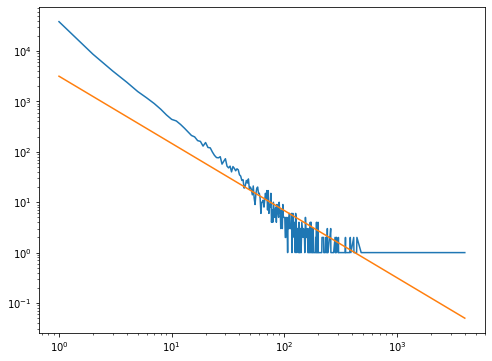

In [35]:
x_, y_ = get_xy_GetInDegCnt(G5)
_, y_fitted_ = fit_xy(x_, y_)

plt.figure(figsize= [8, 6])
plt.loglog(x_, y_)
plt.loglog(x_, y_fitted_)
plt.show()

### Wiki-vote

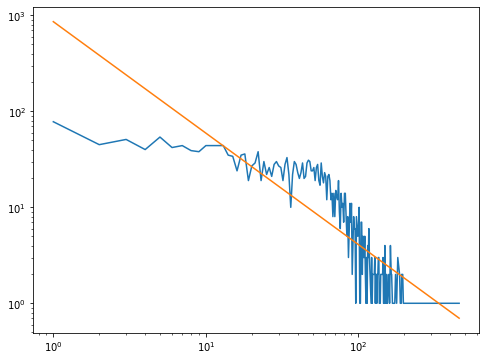

In [36]:
case_name = "wiki-Vote"
case_txt = case_name+".txt"
g_hw0_q2 = snap.LoadEdgeList(snap.PNGraph, case_txt, 0, 1)

x_, y_ = get_xy_GetInDegCnt(g_hw0_q2)
_, y_fitted_ = fit_xy(x_, y_)

plt.figure(figsize= [8, 6])
plt.loglog(x_, y_)
plt.loglog(x_, y_fitted_)
plt.show()

### Thought

In [37]:
print ("--- Stackoverflow ---")
_ = get_xy_GetInDegCnt(G5, True)

--- Stackoverflow ---
 1 in-degree: 38306 nodes
 2 in-degree: 8676 nodes
 3 in-degree: 4013 nodes
 4 in-degree: 2405 nodes
 5 in-degree: 1572 nodes
 6 in-degree: 1178 nodes
 7 in-degree: 909 nodes
 8 in-degree: 701 nodes
 9 in-degree: 539 nodes
 10 in-degree: 441 nodes
 11 in-degree: 410 nodes
 12 in-degree: 349 nodes
 13 in-degree: 294 nodes
 14 in-degree: 248 nodes
 15 in-degree: 211 nodes
 16 in-degree: 198 nodes
 17 in-degree: 167 nodes
 18 in-degree: 161 nodes
 19 in-degree: 130 nodes
 20 in-degree: 153 nodes
 21 in-degree: 122 nodes
 22 in-degree: 120 nodes
 23 in-degree: 99 nodes
 24 in-degree: 85 nodes
 25 in-degree: 77 nodes
 26 in-degree: 76 nodes
 27 in-degree: 80 nodes
 28 in-degree: 57 nodes
 29 in-degree: 65 nodes
 30 in-degree: 73 nodes
 31 in-degree: 52 nodes
 32 in-degree: 48 nodes
 33 in-degree: 52 nodes
 34 in-degree: 40 nodes
 35 in-degree: 51 nodes
 36 in-degree: 47 nodes
 37 in-degree: 42 nodes
 38 in-degree: 46 nodes
 39 in-degree: 44 nodes
 40 in-degree: 35 node

In [38]:
print ("--- Wiki-vote ---")
_ = get_xy_GetInDegCnt(g_hw0_q2, True)

--- Wiki-vote ---
 1 in-degree: 78 nodes
 2 in-degree: 45 nodes
 3 in-degree: 51 nodes
 4 in-degree: 40 nodes
 5 in-degree: 54 nodes
 6 in-degree: 42 nodes
 7 in-degree: 44 nodes
 8 in-degree: 39 nodes
 9 in-degree: 38 nodes
 10 in-degree: 44 nodes
 11 in-degree: 44 nodes
 12 in-degree: 44 nodes
 13 in-degree: 44 nodes
 14 in-degree: 35 nodes
 15 in-degree: 34 nodes
 16 in-degree: 24 nodes
 17 in-degree: 35 nodes
 18 in-degree: 36 nodes
 19 in-degree: 19 nodes
 20 in-degree: 27 nodes
 21 in-degree: 29 nodes
 22 in-degree: 38 nodes
 23 in-degree: 19 nodes
 24 in-degree: 30 nodes
 25 in-degree: 22 nodes
 26 in-degree: 26 nodes
 27 in-degree: 21 nodes
 28 in-degree: 28 nodes
 29 in-degree: 30 nodes
 30 in-degree: 27 nodes
 31 in-degree: 26 nodes
 32 in-degree: 19 nodes
 33 in-degree: 28 nodes
 34 in-degree: 33 nodes
 35 in-degree: 22 nodes
 36 in-degree: 10 nodes
 37 in-degree: 22 nodes
 38 in-degree: 30 nodes
 39 in-degree: 28 nodes
 40 in-degree: 23 nodes
 41 in-degree: 20 nodes
 42 in-